This notebook demonstrates minibacth gradient descent algorithm for linear regression with single feature

Minibatch gradient descent is used for large datasets to save computational time and resources

A synthetic dataset with single feature (House size) and continuous target value (price) is used for the demo



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
# Generate synthetic housing data
np.random.seed(0)
# Number of samples
m = 100
# House size in 1000 square feet (feature: x_1)
x_1 = 2 * np.random.rand(m, 1) + 3  
# Label y
y = 200 + 100 * x_1 + np.random.randn(m, 1) * 20  # Price in $1000

In [3]:
# Normalize data using StandardScaler
scaler_x = StandardScaler()
scaler_y = StandardScaler()
x_1_normalized = scaler_x.fit_transform(x_1)
y_normalized = scaler_y.fit_transform(y)

In [4]:
# Add bias term (intercept term) and create the feature matrix X
# First column contains 1s and second column contains house size
X_normalized = np.c_[np.ones((m, 1)), x_1_normalized]

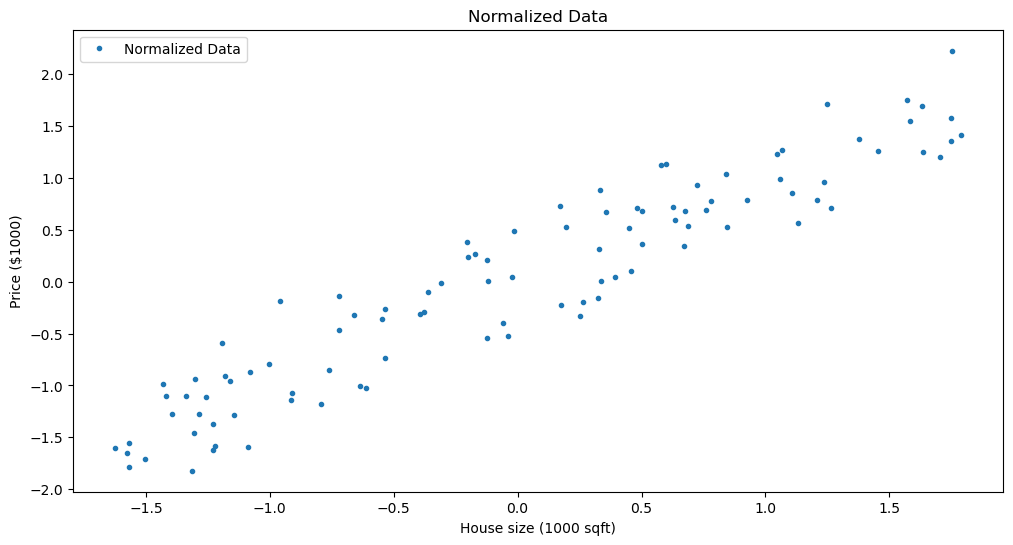

In [5]:
# Plot the normalized data
plt.figure(figsize=(12, 6))
plt.plot(x_1_normalized, y_normalized, ".", label="Normalized Data")
plt.xlabel("House size (1000 sqft)")
plt.ylabel("Price ($1000)")
plt.legend()
plt.title("Normalized Data")
plt.show()

In [6]:
# Function to compute the cost function
def calculate_residual_error(X, y, w):
    m = len(y)
    predictions = X.dot(w)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

# Mini-Batch Gradient Descent function
def mini_batch_gradient_descent(X, y, learning_rate=0.01, n_iterations=100, batch_size=10):
    m = len(y)
    w = np.random.randn(X.shape[1], 1)  # Random initialization
    residual_error_history = []

    for iteration in range(n_iterations):
        shuffled_indices = np.random.permutation(m)
        X_shuffled = X[shuffled_indices]
        y_shuffled = y[shuffled_indices]
        
        for i in range(0, m, batch_size):
            xi = X_shuffled[i:i+batch_size]
            yi = y_shuffled[i:i+batch_size]
            gradients = (1 / batch_size) * xi.T.dot(xi.dot(w) - yi)
            w = w - learning_rate * gradients

        residual_error = calculate_residual_error(X, y, w)
        residual_error_history.append(residual_error)

    return w, residual_error_history



Gradient Descent:
    batch_size = m


Minibatch Gradient Descent:
    1 <= batch_size <= m

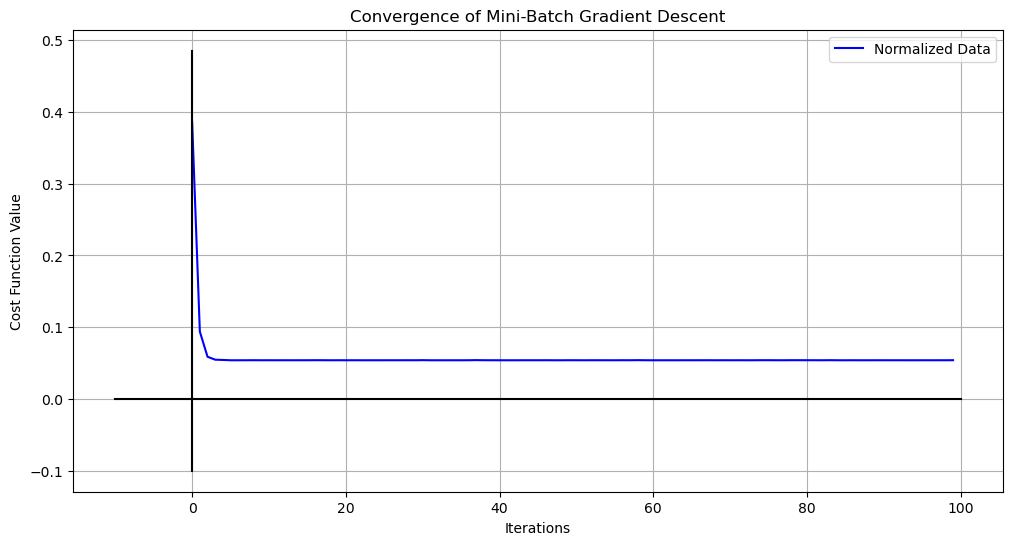

Weights for normalized data: [0.00572998 0.93123059]


In [7]:
n_iterations = 100
batch_size = 10

# Perform mini-batch gradient descent on normalized data
learning_rate = 0.1  
w_normalized, residual_error_history = mini_batch_gradient_descent(X_normalized, y_normalized, learning_rate, n_iterations, batch_size)

# Plot convergence of the cost function
plt.figure(figsize=(12, 6))
plt.plot(range(len(residual_error_history)), residual_error_history, label='Normalized Data', color='blue')
plt.plot([-10, 100], [0, 0], "k-")
plt.plot([0, 0], [-0.1, residual_error_history[0]+0.1], "k-")
plt.xlabel('Iterations')
plt.ylabel('Cost Function Value')
plt.title('Convergence of Mini-Batch Gradient Descent')
plt.legend()
plt.grid(True)
plt.show()

print('Weights for normalized data:', w_normalized.ravel())